# **MILESTONE 2**

___
**Nama**  		: Rafi Arya Siregar

**Batch** 		: HCK-028

**Obyektif**	: 
___

# **A. LATAR BELAKANG STUDY CASE**
___
Saya merupakan seorang data scientist yang ditugaskan untuk membuat model machine learning guna memprediksi potensi resign calon karyawan. Proyek ini di latar belakangi oleh tingginya laporan attrition yang diterima perusahaan selama satu tahun terakhir. Hal ini dapat berdampak pada stabilitas organisasi, seperti meningkatnya biaya rekrutmen, hilangnya pengetahuan dan pengalaman karyawan, serta penurunan moral karyawan yang bertahan. Dengan memprediksi potensi resign, perusahaan dapat mengambil langkah-langkah pencegahan, seperti meningkatkan kebijakan retensi dan kepuasan kerja, untuk menjaga kelangsungan dan kestabilan organisasi. Menggunakan framework SMART, saya dapat mengelola proyek ini agar berjalan dengan terarah. Berikut penjabaran SMART.

## **SMART FRAMEWORK**
___

**PROBLEM STATEMENT:**
Membuat model machine learning dalam waktu 3 bulan untuk memprediksi potensi resign karyawan, dengan mengukur akurasi, precision, recall, dan F1-score, guna membantu perusahaan mengidentifikasi karyawan yang berisiko resign dan meningkatkan tingkat retensi karyawan.

- **Specific**: Mengembangkan model machine learning untuk memprediksi potensi resign karyawan berdasarkan data historis perusahaan.
- **Measurable**:  Model akan dievaluasi menggunakan metrik akurasi, precision, recall, dan F1-score untuk mengukur sejauh mana model dapat memprediksi karyawan yang berisiko resign.
- **Achievable**: Menggunakan dataset yang sudah tersedia dan teknik machine learning yang sesuai (seperti regresi logistik, decision tree, atau random forest) untuk membangun model.
- **Relevant**: Model ini akan memberikan informasi penting yang dapat membantu perusahaan mengidentifikasi karyawan yang berisiko resign dan mengambil langkah-langkah pencegahan untuk meningkatkan retensi dan mengurangi biaya rekrutmen.
- **Time Bound**: Pengembangan model diharapkan selesai dalam waktu 1 bulan, dan evaluasi hasil prediksi dilakukan pada bulan keempat.

## **PENJABARAN MASALAH**
Berdasarkan	*problem statement* di atas, terdapat tujuh poin permasalahan yang saya angkat:

1. Bagaimana distribusi usia karyawan yang mengalami attrition dibandingkan dengan yang tidak?
2. Apakah terdapat perbedaan signifikan dalam tingkat kepuasan kerja antara karyawan yang bertahan dan yang keluar?
3. Bagaimana persebaran lama bekerja karyawan dengan peluang memimpin divisi?
4. Apakah ada perbedaan dalam tingkat attrition berdasarkan departemen atau peran pekerjaan?
5. Sejauh mana faktor-faktor seperti jarak dari rumah ke tempat kerja mempengaruhi keputusan karyawan untuk bertahan?
6. Bagaimana hubungan antara gaji bulanan dan tingkat attrition?
7. Apakah terdapat hubungan antara pendapatan karyawan pada level pendidikan tertentu terhadap attrition?

## **JUSTIFIKASI PERMASALAHAN**
___ 

Permasalahan attrition karyawan atau yang biasa disebut dengan *resign* berpengaruh terhadap keberlanjutan perusahaan. Kepuasan kinerja karyawan berpengaruh terhadap pengunduruan diri karyawan. [**Artikel**](https://eprints.uniska-bjm.ac.id/8005/1/ARTIKEL%20RATNA%20SARI%20FIX.pdf) yang dikemukakan oleh Sari, et al.,   menekankan bahwa terdapat beberapa variabel yang mempengaruhi, antara lain adalah faktor kepuasan kerja yang dipengaruhi oleh gaji, prospek karir, dan kinerja. Menggunakan dataset [**Employee Attrition Classification Dataset**](https://www.kaggle.com/datasets/stealthtechnologies/employee-attrition-dataset), saya dapat melakukan eksplorasi analissi lebih dalam untuk membuat sebuah model machine learning yang optimal dalam memprediksi.

# **B. IMPORT LIBRARIES**
___
Mengimport beberapa library yang digunakan untuk proses pengolahan data, perhitungan statistika, proses modeling, dan proses evaluasi model.

In [1]:
# Data Manipulation
import pandas as pd  # Untuk manipulasi data
import numpy as np
from scipy import stats

# Visualisasi Data
import matplotlib.pyplot as plt  # Visualisasi data menggunakan matplotlib
import seaborn as sns  # Visualisasi data menggunakan seaborn

# EDA (Exploratory Data Analysis)
import eda_package as ep  # Mengimpor package EDA kustom yang dibuat sendiri

# Model Evaluation Metrics
from sklearn.metrics import silhouette_score, silhouette_samples  # Untuk evaluasi clustering

# Imputasi Data
from sklearn.impute import KNNImputer  # Menggunakan KNN untuk imputasi missing values

# Data Preprocessing and Transformation
from sklearn.pipeline import Pipeline  # Untuk membuat pipeline model
from sklearn.compose import ColumnTransformer  # Untuk melakukan transformasi pada data berdasarkan kolom
from sklearn.preprocessing import (RobustScaler, StandardScaler, 
                                   OneHotEncoder, LabelEncoder, OrdinalEncoder)  # Preprocessing

from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

# Model Algorithm
import pickle  # Untuk menyimpan dan memuat model

# Splitting train & test data
from sklearn.model_selection import train_test_split

# Model Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Feature Engineering - Outlier Handling
from feature_engine.outliers import Winsorizer

# Model Evaluation Metrics
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Model Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform  # Untuk distribusi random search

# Disable all warnings
import warnings
warnings.filterwarnings('ignore')


# **C. DATA LOADING**
___
Mempersiapkan dataset untuk keperluan EDA dan Modeling pada tahap-tahap selanjutnya dengan mengidentifikasi dan menangani informasi struktur data berupa baris, kolom, missing values, duplicated values, tipe data dan konsistensi data yang dikelola. 

In [2]:
# Melakukan import dataset_2.csv ke dataframe data.
dataset = pd.read_csv('P1M2_rafi_siregar.csv')
dataset.columns = dataset.columns.str.strip().str.replace(r'[\s,-]+', '_', regex=True)
head = dataset.head(10)
tail = dataset.tail(10)

# Menampilkan top 10 ascending dan descending data sebanyak 10 query
print('--- Top 10 Dataset Ascending ---')
display(head)
print('\n--- Top 10 Dataset Descending ---')
display(tail)

--- Top 10 Dataset Ascending ---


,Employee_ID,Age,Gender,Years_at_Company,Job_Role,Monthly_Income,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Number_of_Promotions,...,Number_of_Dependents,Job_Level,Company_Size,Company_Tenure,Remote_Work,Leadership_Opportunities,Innovation_Opportunities,Company_Reputation,Employee_Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed
5,3496,45,Female,30,Healthcare,8104,Fair,High,Average,0,...,0,Senior,Large,75,No,No,No,Good,Low,Stayed
6,46775,22,Female,5,Healthcare,8700,Good,High,Average,0,...,0,Mid,Small,48,No,No,No,Poor,High,Stayed
7,72645,34,Female,15,Technology,11025,Fair,Medium,High,1,...,4,Entry,Large,16,No,No,No,Good,Low,Left
8,4941,48,Female,40,Technology,11452,Good,Medium,Below Average,0,...,1,Mid,Large,52,No,No,No,Good,Medium,Stayed
9,65181,55,Female,16,Media,5939,Poor,High,Average,0,...,1,Entry,Small,46,No,No,No,Good,High,Stayed



--- Top 10 Dataset Descending ---


,Employee_ID,Age,Gender,Years_at_Company,Job_Role,Monthly_Income,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Number_of_Promotions,...,Number_of_Dependents,Job_Level,Company_Size,Company_Tenure,Remote_Work,Leadership_Opportunities,Innovation_Opportunities,Company_Reputation,Employee_Recognition,Attrition
74488,67222,49,Male,28,Technology,6533,Fair,Medium,High,1,...,4,Entry,Medium,93,No,No,No,Good,Medium,Left
74489,41091,18,Male,5,Healthcare,9563,Good,Low,Average,0,...,4,Entry,Large,23,No,No,No,Poor,Medium,Left
74490,16024,23,Male,10,Healthcare,8143,Fair,High,Average,0,...,1,Mid,Small,73,No,No,No,Fair,Medium,Left
74491,60264,42,Male,10,Technology,10727,Good,High,Average,0,...,1,Mid,Small,73,No,No,No,Fair,High,Left
74492,44132,38,Male,23,Finance,10351,Excellent,Medium,Below Average,2,...,4,Entry,Small,54,No,No,No,Poor,Medium,Stayed
74493,37195,50,Female,12,Education,4414,Fair,High,Average,1,...,2,Senior,Small,35,No,No,Yes,Poor,Very High,Left
74494,6266,18,Male,4,Healthcare,8040,Fair,High,High,3,...,0,Senior,Medium,73,No,No,No,Fair,Medium,Left
74495,54887,22,Female,14,Technology,7944,Fair,High,High,0,...,2,Entry,Small,29,No,Yes,No,Good,Medium,Stayed
74496,861,23,Male,8,Education,2931,Fair,Very High,Average,0,...,0,Entry,Large,9,No,No,No,Good,Low,Left
74497,15796,56,Male,19,Technology,6660,Good,High,Average,0,...,3,Mid,Medium,81,No,No,No,Good,Low,Stayed


**Berikut adalah keterangan dari dari setiap value kolom:**

| **Atribut Tabel**            | **Penjelasan**                                                                                                      |
| ---------------------------- | ------------------------------------------------------------------------------------------------------------------- |
| **Employee ID**              | ID unik yang diberikan kepada setiap karyawan.                                                                      |
| **Age**                      | Umur karyawan, biasanya dalam tahun.                                                                                |
| **Gender**                   | Jenis kelamin karyawan (Laki-laki atau Perempuan).                                                                  |
| **Years at Company**         | Jumlah tahun yang telah dihabiskan karyawan di perusahaan.                                                          |
| **Monthly Income**           | Pendapatan bulanan karyawan dalam dolar.                                                                            |
| **Job Role**                 | Peran atau jabatan pekerjaan yang dijalani karyawan dalam perusahaan.                                               |
| **Work-Life Balance**        | Penilaian terhadap keseimbangan antara pekerjaan dan kehidupan pribadi karyawan.                                    |
| **Job Satisfaction**         | Tingkat kepuasan karyawan terhadap pekerjaan mereka.                                                                |
| **Performance Rating**       | Penilaian kinerja karyawan oleh perusahaan, bisa berupa rating atau skor evaluasi.                                  |
| **Overtime**                 | Status apakah karyawan bekerja lembur (Yes/No).                                                                     |
| **Number of Promotions**     | Jumlah promosi yang telah diterima oleh karyawan dalam perusahaan.                                                  |
| **Distance from Home**       | Jarak antara tempat tinggal karyawan dengan tempat kerja dalam mil.                                                 |
| **Education Level**          | Tingkat pendidikan terakhir yang dicapai oleh karyawan.                                                             |
| **Marital Status**           | Status pernikahan karyawan (Menikah, Belum Menikah, atau lainnya).                                                  |
| **Number of Dependents**     | Jumlah tanggungan yang dimiliki oleh karyawan (misalnya, anak atau anggota keluarga lainnya).                      |
| **Job Level**                | Tingkatan jabatan karyawan di perusahaan (misalnya, level manajer, supervisor, dll.).                               |
| **Company Size**             | Ukuran perusahaan, yang mungkin mencakup jumlah karyawan atau pendapatan perusahaan.                                |
| **Company Tenure**           | Masa kerja karyawan dalam perusahaan, diukur dalam tahun.                                                           |
| **Remote Work**              | Apakah karyawan bekerja dari jarak jauh (remote) atau bekerja di kantor.                                            |
| **Leadership Opportunities** | Kesempatan yang diberikan perusahaan kepada karyawan untuk berperan dalam kepemimpinan.                             |
| **Innovation Opportunities** | Kesempatan bagi karyawan untuk berpartisipasi dalam inovasi atau pengembangan ide baru.                             |
| **Company Reputation**       | Reputasi perusahaan di mata karyawan atau publik.                                                                   |
| **Employee Recognition**     | Penghargaan atau pengakuan yang diberikan kepada karyawan atas pencapaian atau kontribusi mereka.                   |
| **Attrition**                | Status apakah karyawan tetap bekerja di perusahaan atau mengundurkan diri (attrisi berarti keluar dari perusahaan). |

overtime sama  Number_of_Dependents gaada. overtime lembur, number itu tanggungan karyawan

In [3]:
ep.data_explore(dataset)

=== Info DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee_ID               74498 non-null  int64 
 1   Age                       74498 non-null  int64 
 2   Gender                    74498 non-null  object
 3   Years_at_Company          74498 non-null  int64 
 4   Job_Role                  74498 non-null  object
 5   Monthly_Income            74498 non-null  int64 
 6   Work_Life_Balance         74498 non-null  object
 7   Job_Satisfaction          74498 non-null  object
 8   Performance_Rating        74498 non-null  object
 9   Number_of_Promotions      74498 non-null  int64 
 10  Overtime                  74498 non-null  object
 11  Distance_from_Home        74498 non-null  int64 
 12  Education_Level           74498 non-null  object
 13  Marital_Status            74498 non-null  object
 14 

,Kolom,Jumlah Missing Value,Jumlah Nilai Unik,Item Unik
0,Employee_ID,0 (0.00%),74498,"[52685, 30585, 54656, 33442, 15667, 3496, 4677..."
1,Age,0 (0.00%),42,"[36, 35, 50, 58, 39, 45, 22, 34, 48, 55, 32, 2..."
2,Gender,0 (0.00%),2,"[Male, Female]"
3,Years_at_Company,0 (0.00%),51,"[13, 7, 44, 24, 30, 5, 15, 40, 16, 12, 3, 14, ..."
4,Job_Role,0 (0.00%),5,"[Healthcare, Education, Media, Technology, Fin..."
5,Monthly_Income,0 (0.00%),9842,"[8029, 4563, 5583, 5525, 4604, 8104, 8700, 110..."
6,Work_Life_Balance,0 (0.00%),4,"[Excellent, Good, Fair, Poor]"
7,Job_Satisfaction,0 (0.00%),4,"[High, Very High, Medium, Low]"
8,Performance_Rating,0 (0.00%),4,"[Average, High, Below Average, Low]"
9,Number_of_Promotions,0 (0.00%),5,"[1, 3, 0, 2, 4]"



=== Duplicate Value & Total Rows ===


,Kategori,Jumlah,Persentase
0,Jumlah Duplicate Rows,0,0.0
1,Jumlah Total Baris,74498,100.0


# **D. EXPLORATORY DATA ANALYSIS**
___
Melakukan kegiatan analisis terhadap datasdet **[P1M2_rafi_siregar.csv](P1M2_rafi_siregar.csv)** dengan melakukan perhitungan statistika deskriptif dan inferensial untuk merepresentasikan insight-insight yang diperoleh dari data.

## **1. Bagaimana distribusi usia karyawan yang mengalami attrition dibandingkan dengan yang tidak?**

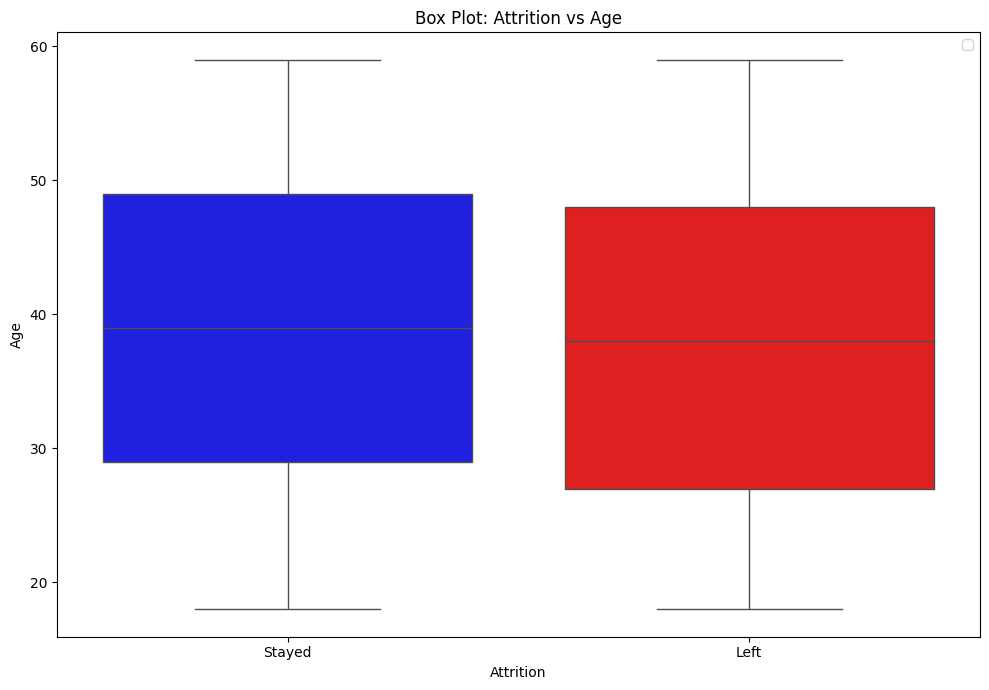

In [47]:
warna = {'Stayed': 'blue', 'Left': 'red'}
ep.plot_relationship(dataset, 'Attrition', target_cols=['Age'], kind='box', custom_colors=warna)

## **2. Apakah terdapat perbedaan signifikan dalam tingkat kepuasan kerja antara karyawan yang bertahan dan yang keluar?**

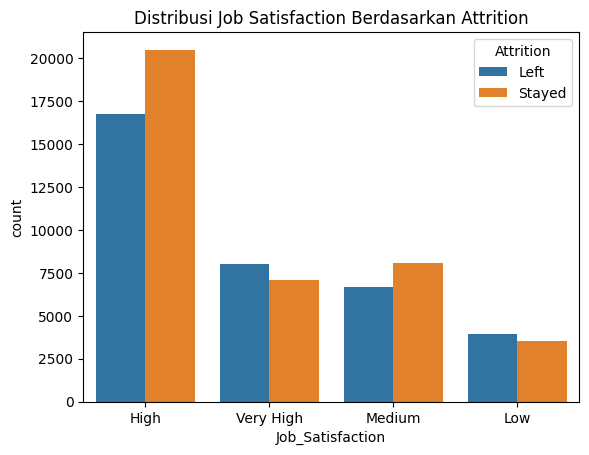


Analisis Korelasi terhadap target ===> 'Attrition'

Tidak ada kolom numerik untuk analisis Point-Biserial.

=== Hasil Chi-Square Analysis ===
            Feature     Chi2  p_value Significance
0  Job_Satisfaction  388.237      0.0   Signifikan

=== Hipotesis ===
H0: Tidak ada hubungan antara Attrition dan fitur.
H1: Ada hubungan antara Attrition dan fitur.

Kesimpulan: Ada hubungan antara Attrition dan Job_Satisfaction


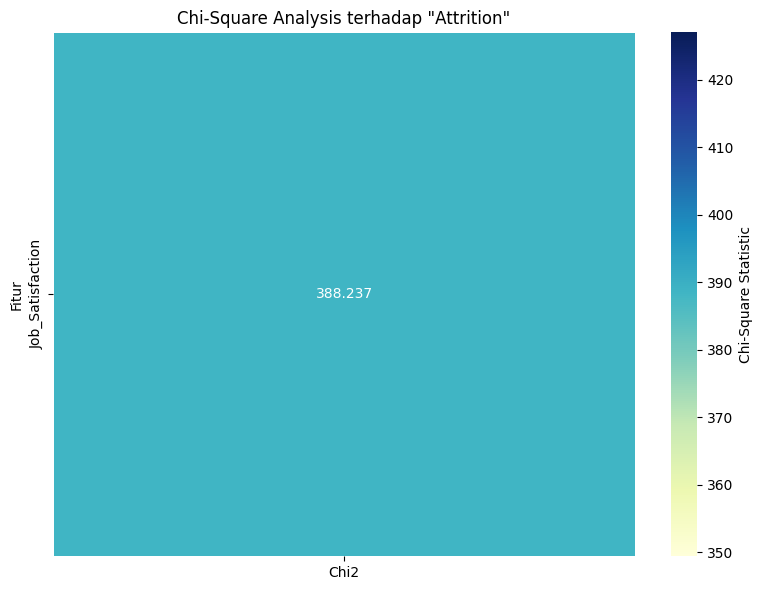

In [58]:
sns.countplot(data=dataset, x='Job_Satisfaction', hue='Attrition')
plt.title('Distribusi Job Satisfaction Berdasarkan Attrition')
plt.show()

attjob = dataset[['Attrition', 'Job_Satisfaction']]
ep.correlation_analysis_binary(attjob, 'Attrition')

## **3. Bagaimana persebaran lama bekerja karyawan dengan peluang memimpin divisi?**

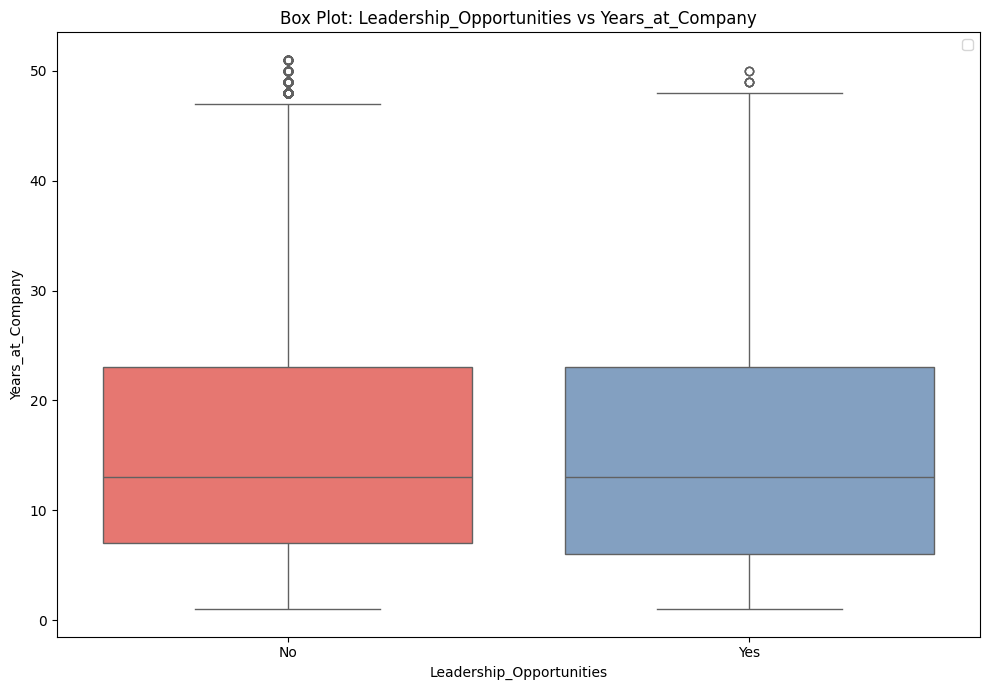

In [63]:
warna1 = {'Yes': '#799FCB', 'No': '#F9665E'}
ep.plot_relationship(dataset, 'Leadership_Opportunities', target_cols=['Years_at_Company'], kind='box', custom_colors=warna1)

## **4. Apakah ada perbedaan dalam tingkat attrition berdasarkan departemen atau peran pekerjaan?**

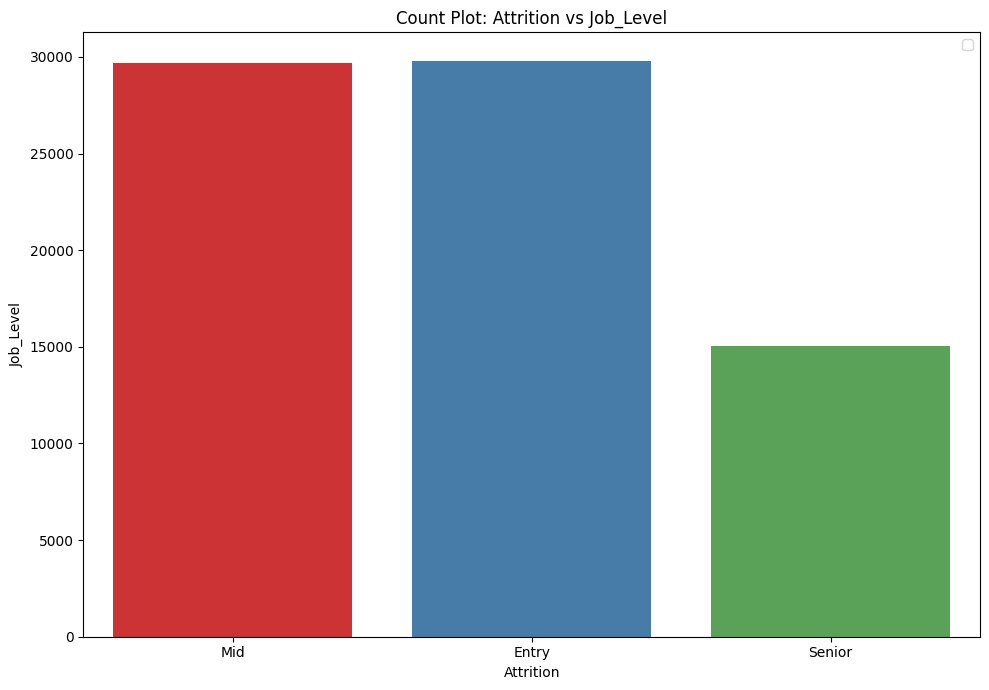

In [7]:
ep.plot_relationship(dataset, 'Attrition', target_cols=['Job_Level'], kind='count')

## **5. Sejauh mana faktor-faktor seperti jarak dari rumah ke tempat kerja mempengaruhi keputusan karyawan untuk bertahan?**


Analisis Korelasi terhadap target ===> 'Attrition'

=== Hasil Point-Biserial Correlation ===
              Feature   r_pb  p_value Significance
0  Distance_from_Home  0.094      0.0   Signifikan

=== Hipotesis ===
H0: Tidak ada hubungan antara Attrition dan fitur.
H1: Ada hubungan antara Attrition dan fitur.

Kesimpulan: Ada hubungan antara Attrition dan Distance_from_Home


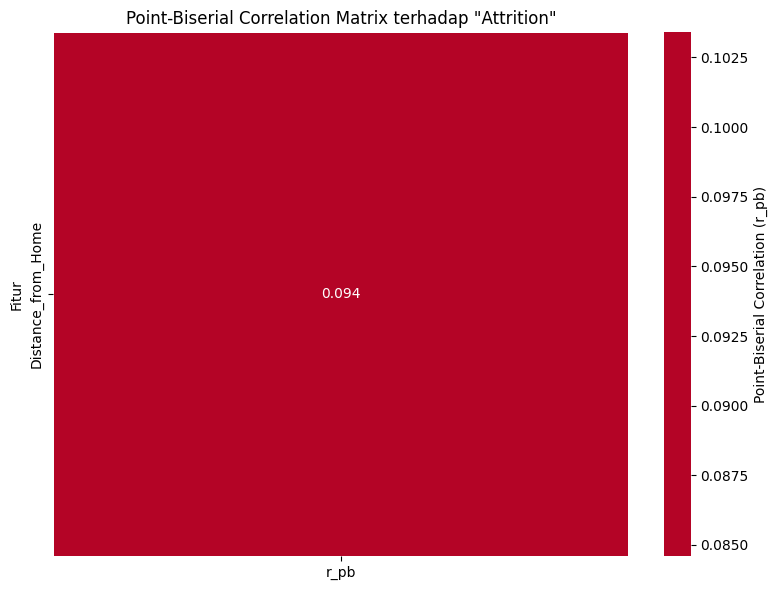


Tidak ada kolom kategorikal untuk analisis Chi-Square.


In [8]:
# Membuat salinan dataset dan memetakan nilai 'Attrition' menjadi 1 (Left) dan 0 (Stayed)
dhmatt = dataset.copy()
dhmatt['Attrition'] = dhmatt['Attrition'].map({'Left': 1, 'Stayed': 0})

# Membuat DataFrame yang berisi kolom yang akan dianalisis
df_dhmatt = dhmatt[['Attrition', 'Distance_from_Home']]

# Menjalankan analisis korelasi biner menggunakan fungsi yang telah ada
ep.correlation_analysis_binary(df_dhmatt, 'Attrition')


## **6. Bagaimana hubungan antara gaji bulanan dan tingkat attrition?**


Analisis Korelasi terhadap target ===> 'Attrition'

=== Hasil Point-Biserial Correlation ===
          Feature   r_pb   p_value Significance
0  Monthly_Income -0.011  0.003533   Signifikan

=== Hipotesis ===
H0: Tidak ada hubungan antara Attrition dan fitur.
H1: Ada hubungan antara Attrition dan fitur.

Kesimpulan: Ada hubungan antara Attrition dan Monthly_Income


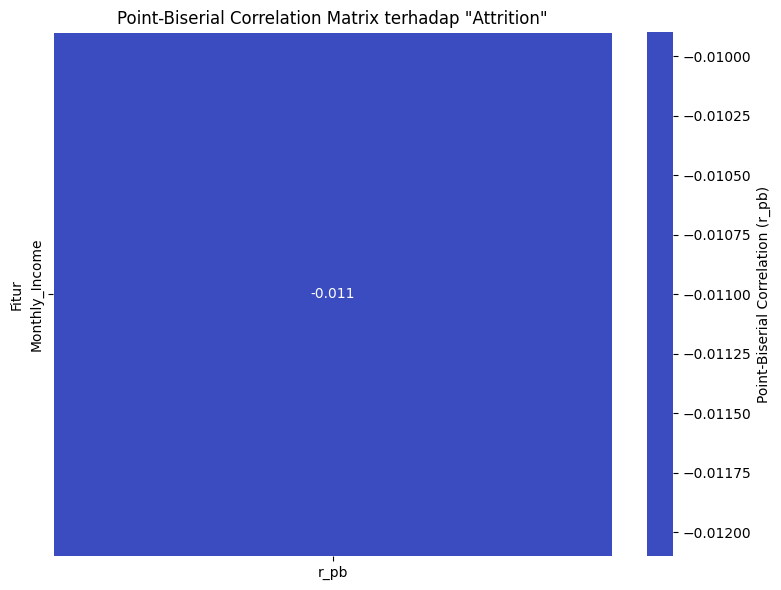


Tidak ada kolom kategorikal untuk analisis Chi-Square.


In [9]:
# Membuat salinan dataset dan memetakan nilai 'Attrition' menjadi 1 (Left) dan 0 (Stayed)
attmon1 = dataset.copy()
attmon1['Attrition'] = attmon1['Attrition'].map({'Left': 1, 'Stayed': 0})

# Membuat DataFrame yang berisi kolom yang akan dianalisis
attmonfin = attmon1[['Attrition', 'Monthly_Income']]

# Menjalankan analisis korelasi biner menggunakan fungsi yang telah ada
ep.correlation_analysis_binary(attmonfin, 'Attrition')


## **7. Apakah terdapat hubungan antara pendapatan karyawan pada level pendidikan tertentu terhadap attrition?**

In [12]:
# Menghitung rata-rata 'Years_at_Company'
average_tenure = dataset['Years_at_Company'].mean()

# Menghitung nilai 'average tenure per employee' dengan membagi rata-rata dengan panjang dataset
average_tenure_per_employee = average_tenure / len(dataset)

# Menampilkan hasil
print(f"Average Tenure: {average_tenure}")
print(f"Average Tenure per Employee: {average_tenure_per_employee}")


Average Tenure: 15.721603264517169
Average Tenure per Employee: 0.00021103389707800437


# **E. FEATURE ENGINEERING**
___
Melakukan persiapan data untuk proses modeling. Tahapan ini akan membagi data feature-target, membagi train-test, membagi data numerik-kategorikal, identifikasi kardinalitas fitur, menseleksi fitur yang digunakan, melakukan pre-processing data dengan handling outlier, imputing data, dan transformasi menggunakan pipeline.

In [13]:
# Menggunakan method copy() untuk menduplikasi dataset pada object dm.
dm = dataset.copy()
dm = dm.drop(['Employee_ID'], axis=1) # drop Identifier

## **I. Split Feature & Target**
Melakukan split data antara feature dengan target. Target yang di tetapkan adalah variabel repeat order berdasarkan kolom ``will_buy_on_return_visit`` sebagai variabel dependen, sedangkan features adalah keseluruhan kolom berdasarkan variabel independen.

In [14]:
#Splitting antara X dan y

X = dm.drop(['Attrition'], axis=1) # features
y = dm['Attrition'] # target

tampilinx1= X.head(5) 
tampiliny1= y.head(5) 

display(tampilinx1) # Menamipilkan top 2 data fitur
display(tampiliny1) # Menampilkan top 2 data target

,Age,Gender,Years_at_Company,Job_Role,Monthly_Income,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Number_of_Promotions,Overtime,...,Marital_Status,Number_of_Dependents,Job_Level,Company_Size,Company_Tenure,Remote_Work,Leadership_Opportunities,Innovation_Opportunities,Company_Reputation,Employee_Recognition
0,36,Male,13,Healthcare,8029,Excellent,High,Average,1,Yes,...,Married,1,Mid,Large,22,No,No,No,Poor,Medium
1,35,Male,7,Education,4563,Good,High,Average,1,Yes,...,Single,4,Entry,Medium,27,No,No,No,Good,High
2,50,Male,7,Education,5583,Fair,High,Average,3,Yes,...,Divorced,2,Senior,Medium,76,No,No,Yes,Good,Low
3,58,Male,44,Media,5525,Fair,Very High,High,0,Yes,...,Single,4,Entry,Medium,96,No,No,No,Poor,Low
4,39,Male,24,Education,4604,Good,High,Average,0,Yes,...,Married,6,Mid,Large,45,Yes,No,No,Good,High


0    Stayed
1      Left
2    Stayed
3      Left
4    Stayed
Name: Attrition, dtype: object

,Nilai,Jumlah,Persentase (%)
0,Stayed,39128,52.522215
1,Left,35370,47.477785


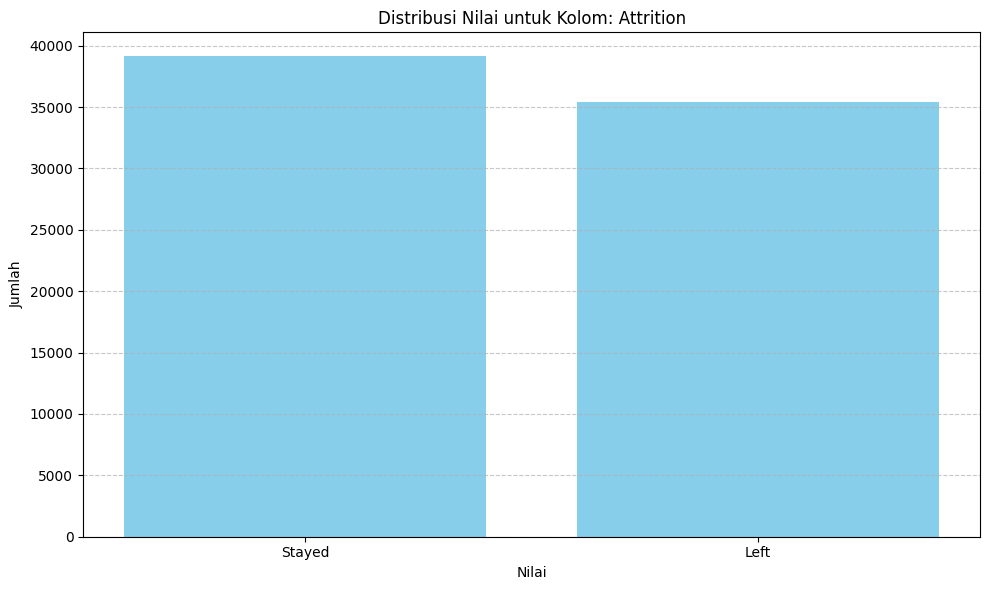

In [15]:
ep.calculate_value_percentage(dm, 'Attrition', plot=True)

In [16]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
# Balikkan hasil encoding (terbalikkan 0 dan 1)
y = 1 - y

y = pd.DataFrame(y)

## **II. Split Data Train & Data Test**
Melakukan splitting data antara tipe data numerik dan tipe data kategori pada train set dan test set.

In [17]:
#Splitting training & testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

print('Train Size   :', X_train.shape)
print('Test Size	:', X_test.shape)

Train Size   : (59598, 22)
Test Size	: (14900, 22)


## **III. Split Data Numerik & Data Kategorikal**
<!-- Memisahkan data kategorikal dan numerik. Berdasarkan hasil EDA pada Bab C, perlu mendefinisikan fitur``bounces`` dan ``latest_ecommerce_progress`` sebagai fitur kategorikal. Maka saya melakukan splitting data numerik dan kategorikan serta data kategorikal yang tidak akan dilakukan proses transformasi. -->

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       74498 non-null  int64 
 1   Gender                    74498 non-null  object
 2   Years_at_Company          74498 non-null  int64 
 3   Job_Role                  74498 non-null  object
 4   Monthly_Income            74498 non-null  int64 
 5   Work_Life_Balance         74498 non-null  object
 6   Job_Satisfaction          74498 non-null  object
 7   Performance_Rating        74498 non-null  object
 8   Number_of_Promotions      74498 non-null  int64 
 9   Overtime                  74498 non-null  object
 10  Distance_from_Home        74498 non-null  int64 
 11  Education_Level           74498 non-null  object
 12  Marital_Status            74498 non-null  object
 13  Number_of_Dependents      74498 non-null  int64 
 14  Job_Level             

In [19]:
# Menentukan fitur kategorikal dan numerikal
cat_feat = list(X.select_dtypes(include='object').columns)
passt =['Number_of_Promotions', 'Number_of_Dependents']
num_feat = [col for col in X.select_dtypes(exclude='object').columns if col not in passt and col != 'Monthly_Income']

# Cek fitur kategorik
listItemCF1 = []
for col in cat_feat:
    listItemCF1.append([col, X[col].nunique(), X[col].unique()])

# Cek fitur numerik (yang akan diproses)
listItemNF1 = []
for col in num_feat:
    listItemNF1.append([col, X[col].nunique(), X[col].unique()])

# # Cek fitur numerik-pass (yang bentuknya string angka, tapi ingin dipertahankan)
listItemCP = []
for col in passt:
    listItemCP.append([col, X[col].nunique(), X[col].unique()])

# Buat DataFrame hasil
dataCF = pd.DataFrame(columns=['Features Category (CF)', 'Jumlah', 'Unique CF'], data=listItemCF1)
dataNF = pd.DataFrame(columns=['Features Numeric (NF)', 'Jumlah', 'Unique NF'], data=listItemNF1)
dataP = pd.DataFrame(columns=['Features Category - Passtrhough', 'Jumlah', 'Unique'], data=listItemCP)

# Tampilkan
display(dataCF)
display(dataNF)
display(dataP)


,Features Category (CF),Jumlah,Unique CF
0,Gender,2,"[Male, Female]"
1,Job_Role,5,"[Healthcare, Education, Media, Technology, Fin..."
2,Work_Life_Balance,4,"[Excellent, Good, Fair, Poor]"
3,Job_Satisfaction,4,"[High, Very High, Medium, Low]"
4,Performance_Rating,4,"[Average, High, Below Average, Low]"
5,Overtime,2,"[Yes, No]"
6,Education_Level,5,"[Master’s Degree, Associate Degree, High Schoo..."
7,Marital_Status,3,"[Married, Single, Divorced]"
8,Job_Level,3,"[Mid, Entry, Senior]"
9,Company_Size,3,"[Large, Medium, Small]"


,Features Numeric (NF),Jumlah,Unique NF
0,Age,42,"[36, 35, 50, 58, 39, 45, 22, 34, 48, 55, 32, 2..."
1,Years_at_Company,51,"[13, 7, 44, 24, 30, 5, 15, 40, 16, 12, 3, 14, ..."
2,Distance_from_Home,99,"[83, 55, 14, 43, 47, 38, 2, 9, 65, 31, 28, 35,..."
3,Company_Tenure,127,"[22, 27, 76, 96, 45, 75, 48, 16, 52, 46, 57, 9..."


,Features Category - Passtrhough,Jumlah,Unique
0,Number_of_Promotions,5,"[1, 3, 0, 2, 4]"
1,Number_of_Dependents,7,"[1, 4, 2, 6, 0, 3, 5]"


## **IV. Missing Value**

## **V. Cardinality**

## **VI. Outlier**

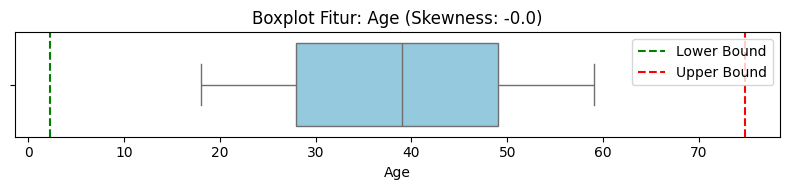

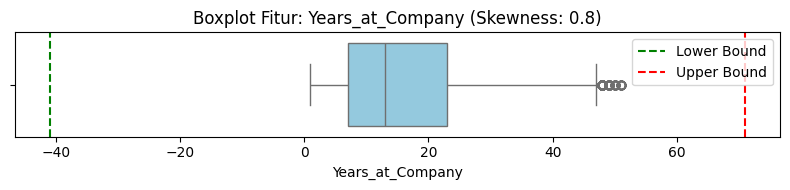

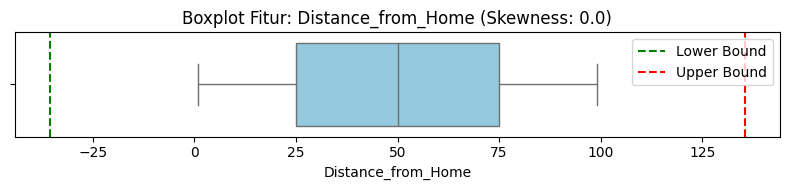

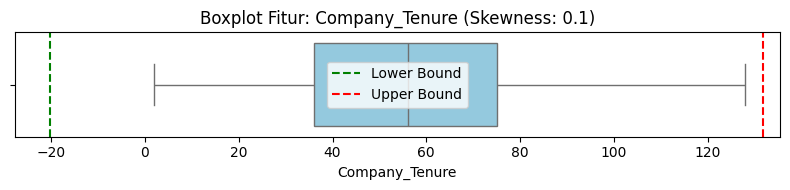

,column,Skewness Value,Distribusi,lower_boundary,upper_boundary,percentage_total_outlier (%)
0,Age,-0.0,normal,2.25,74.82,0.0
1,Years_at_Company,0.8,skewed,-41.00,71.00,0.0
2,Distance_from_Home,0.0,normal,-35.62,135.58,0.0
3,Company_Tenure,0.1,normal,-20.31,131.74,0.0


In [20]:
ep.check_outlier(X_train[num_feat])

## **VII. Feature Selection**

In [21]:
# dataset['Education_Level'].value_counts()

In [22]:
# dataset['Number_of_Promotions'].value_counts()

In [23]:
# dataset['Promotion_Salary'].value_counts()

In [ ]:
education_map = {
    'High School': 'High School',
    'Associate Degree': 'Associate Degree',
    'Bachelor’s Degree': "Bachelor's Degree",  # Pastikan untuk mengganti tanda kutip sesuai dengan format yang diinginkan
    'Master’s Degree': "Master's Degree",     # Pastikan untuk mengganti tanda kutip sesuai dengan format yang diinginkan
    'PhD': 'PhD'}

X_train['Education_Level'] = X_train['Education_Level'].map(education_map)
X_test['Education_Level'] = X_test['Education_Level'].map(education_map)

In [25]:
onehot = [
    'Gender',
    'Job_Role',
    'Marital_Status',
    'Overtime',
    'Remote_Work',
    'Leadership_Opportunities',
    'Innovation_Opportunities'
]

ordinal = [
    "Work_Life_Balance",
    "Education_Level",
    "Job_Level",
    "Company_Size",
    "Company_Reputation",
    "Performance_Rating",
    "Job_Satisfaction"
]

ordinal_categories = [
    ["Poor", "Fair", "Good", "Excellent"],  # Work_Life_Balance
    ["High School", "Associate Degree", "Bachelor's Degree", "Master's Degree", "PhD"],  # Education_Level
    ["Entry", "Mid", "Senior"],  # Job_Level
    ["Small", "Medium", "Large"],  # Company_Size
    ["Poor", "Fair", "Good", "Excellent"],  # Company_Reputation
    ["Low", "Below Average", "Average", "High"],  # Performance_Rating
    ["Low", "Medium", "High", "Very High"]  # Job_Satisfaction
]

## **VII. Pipeline**

In [26]:
# Definisikan pipeline untuk numerikal kolom dataset 2
num_pipe = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('winsorizer', Winsorizer(capping_method='iqr', tail='both', fold=3)),  
    ('scaler', StandardScaler())
])

# Definisikan pipeline untuk kateogrikal kolom dataset 2
cat_pipe_ordinal = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(categories=ordinal_categories))
])

cat_pipe_onehot = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

# Pipeline untuk preprocessing dataset 2
preprocess = ColumnTransformer(transformers=[
    ('numerical', num_pipe, num_feat),
    ('categorical_ordinal', cat_pipe_ordinal, ordinal),
    ('categorical_onehot', cat_pipe_onehot, onehot),
    ('passthrough', 'passthrough', passt) 
])

# **F. MODELING PART I - BEST MODEL**

## **I. MODEL DEFINITION**
___
Pipeline untuk menyederhanakan proses **model definition** berdasarkan hasil preprocessing sebelumnya. Saya menggunakan algoritma KNN, SVM, Decision Tree, Random Forest, dan Boosting untuk melakukan pemodelan.

In [27]:
# Mendefinisikan model langsung
random_state = 42
models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state=random_state),
    'Decision Tree': DecisionTreeClassifier(random_state=random_state),
    'Random Forest': RandomForestClassifier(random_state=random_state),
    'Boosting': GradientBoostingClassifier(random_state=random_state)
}

## **II. MODEL TRAINING**
___
Melakukan **model training** pada dataset train pada data fitur dan data target.

In [28]:
import warnings

# Mengabaikan semua peringatan
warnings.filterwarnings('ignore')

# Dictionary untuk menyimpan hasil pelatihan
pipelines = {}

# List untuk menyimpan hasil cv_scores
cv_scores_list = []

results = []

# Looping untuk melatih setiap model
for model_name, model in models.items():
    # Pipeline untuk setiap model
    pipeline = Pipeline([
        ('preprocess', preprocess),  # Proses preprocessing yang sudah disiapkan
        ('model', model)
    ])
    
    # Cross-validation untuk model
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='recall', n_jobs=-1)

    # Menyimpan pipeline yang sudah dilatih ke dalam dictionary
    pipelines[model_name] = pipeline  # Menyimpan pipeline yang dilatih
    
    # Menyimpan hasil cv_scores ke dalam list
    cv_scores_list.append(cv_scores)  # Menyimpan hasil cv_scores per model dalam list

    # Menyimpan hasil dalam objek
    model_result = {
        'Model': model_name,
        'Recall Scores': cv_scores,
        'Mean Recall': cv_scores.mean(),
        'Standard Deviation Recall': cv_scores.std(),
        'Range': (cv_scores.mean() - cv_scores.std(), cv_scores.mean() + cv_scores.std())
    }
    
    results.append(model_result)

# Mengubah hasil menjadi DataFrame
HasilCV = pd.DataFrame(results)

## **III. MODEL EVALUATION**
___
Melakukan **model evaluation** terhadap hasil modeling menggunakan cross-validation pada setiap algoritma.

In [30]:
HasilCV

,Model,Recall Scores,Mean Recall,Standard Deviation Recall,Range
0,KNN,"[0.680035335689046, 0.6743240855274784, 0.6851...",0.682676,0.004911,"(0.6777654971576024, 0.6875866827091097)"
1,SVM,"[0.7316254416961131, 0.7289273723272663, 0.730...",0.731588,0.003497,"(0.7280905633453096, 0.7350844410412114)"
2,Decision Tree,"[0.6409893992932862, 0.6593037639158862, 0.652...",0.651117,0.005968,"(0.645148654137069, 0.6570855929455044)"
3,Random Forest,"[0.7220848056537102, 0.7215055663544796, 0.710...",0.720844,0.005356,"(0.7154883109099441, 0.7261994724577425)"
4,Boosting,"[0.7360424028268551, 0.7365258879660718, 0.734...",0.738196,0.003002,"(0.7351946050291068, 0.7411979701677248)"


# **G. MODELING PART II - HYPERPARAMETER TUNING**

In [32]:
pipelines['Boosting']

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=3,
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Years_at_Company',
                                                   'Distance_from_Home',
                                                   'Company_Tenure']),
                                                 ('categorical_ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strateg...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Job_Role',
                                                   'Marital_Status', 'Overtime',
                                                   'Remote_Work',
                                                   'Leadership_Opportunities',
                                                   'Innovation_Opportunities']),
                                                 ('passthrough', 'passthrough',
                                                  ['Number_of_Promotions',
                                                   'Number_of_Dependents'])])),
                ('model', GradientBoostingClassifier(random_state=42))])

In [34]:
# Definisikan parameter distribusi untuk RandomizedSearchCV
param_dist = {
    'model__n_estimators': [50, 100, 150, 200, 250],
    'model__learning_rate': uniform(0.01, 0.1),  # Distribusi acak untuk learning rate
    'model__max_depth': [5, 7, 10, 12],  # Ubah sesuai dengan max_depth yang lebih besar dari default 3
    'model__subsample': [0.8, 0.9, 1.0],  # Ubah subsample sesuai preferensi
    'model__min_samples_split': [2, 5, 10],  # Ubah sesuai dengan nilai min_samples_split default
    'model__min_samples_leaf': [1, 2, 4],  # Ubah sesuai dengan nilai min_samples_leaf default
    'model__max_features': ['sqrt', 'log2', None],  # Ubah max_features yang lebih fleksibel
    'model__loss': ['log_loss'],  # Loss default
    'model__criterion': ['friedman_mse'],  # Default criterion
    'model__min_weight_fraction_leaf': [0.0],  # Default value untuk min_weight_fraction_leaf
    'model__min_impurity_decrease': [0.0],  # Default value untuk min_impurity_decrease
    'model__warm_start': [False],  # Default warm_start
    'model__validation_fraction': [0.1],  # Default validation_fraction
    'model__n_iter_no_change': [None],  # Default n_iter_no_change
    'model__tol': [0.0001],  # Default tol
    'model__ccp_alpha': [0.0]  # Default ccp_alpha
}

# Gunakan RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=pipelines['Boosting'],
                                   param_distributions=param_dist,
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Latih model dengan RandomizedSearchCV
random_search.fit(X_train, y_train)

### JANGAN DIAPA-APAIN
# Tampilkan parameter terbaik yang ditemukan
print("Best parameters found: ", random_search.best_params_)
### JANGAN DIAPA-APAIN


# Tampilkan recall pada data uji dengan parameter terbaik
best_model = random_search.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'model__ccp_alpha': 0.0, 'model__criterion': 'friedman_mse', 'model__learning_rate': np.float64(0.06222432600548044), 'model__loss': 'log_loss', 'model__max_depth': 5, 'model__max_features': 'sqrt', 'model__min_impurity_decrease': 0.0, 'model__min_samples_leaf': 4, 'model__min_samples_split': 5, 'model__min_weight_fraction_leaf': 0.0, 'model__n_estimators': 250, 'model__n_iter_no_change': None, 'model__subsample': 0.9, 'model__tol': 0.0001, 'model__validation_fraction': 0.1, 'model__warm_start': False}


# **H. EVALUATION MODEL AFTER HYPERPARAMETER TUNING**
___

In [38]:
# Prediksi dengan model terbaik
y_pred_tuning_train = best_model.predict(X_train)
y_pred_tuning_test = best_model.predict(X_test)

# Menghitung akurasi, recall, dan F1-score untuk data pelatihan dan data uji
accuracy_tuning_train = accuracy_score(y_train, y_pred_tuning_train)
accuracy_tuning_test = accuracy_score(y_test, y_pred_tuning_test)
recall_tuning_train = recall_score(y_train, y_pred_tuning_train)
recall_tuning_test = recall_score(y_test, y_pred_tuning_test)
f1_tuning_train = f1_score(y_train, y_pred_tuning_train)
f1_tuning_test = f1_score(y_test, y_pred_tuning_test)

# Menampilkan hasil evaluasi
print(f'Train Accuracy - Tuning: {accuracy_tuning_train}')
print(f'Test Accuracy - Tuning: {accuracy_tuning_test}')
print(f'Train Recall - Tuning: {recall_tuning_train}')
print(f'Test Recall - Tuning: {recall_tuning_test}')
print(f'Train F1-Score - Tuning: {f1_tuning_train}')
print(f'Test F1-Score - Tuning: {f1_tuning_test}')

Train Accuracy - Tuning: 0.7701768515722004
Test Accuracy - Tuning: 0.7600671140939598
Train Recall - Tuning: 0.7580223353124117
Test Recall - Tuning: 0.7451229855810009
Train F1-Score - Tuning: 0.7579821539005213
Test F1-Score - Tuning: 0.7467592264645463


In [44]:
# Contoh penggunaan fungsi untuk data latih dan data uji
ep.evaluate_model_class_report(pipelines['Boosting'], X_train, y_train, X_test, y_test)

=============== Classification Report ===============

Train Data:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77     31302
           1       0.75      0.74      0.75     28296

    accuracy                           0.76     59598
   macro avg       0.76      0.76      0.76     59598
weighted avg       0.76      0.76      0.76     59598

------------------------------------------------------
Test Data:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      7826
           1       0.75      0.74      0.74      7074

    accuracy                           0.76     14900
   macro avg       0.76      0.76      0.76     14900
weighted avg       0.76      0.76      0.76     14900



In [40]:
# Contoh penggunaan fungsi untuk data latih dan data uji
ep.evaluate_model_class_report(best_model, X_train, y_train, X_test, y_test)

=============== Classification Report ===============

Train Data:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78     31302
           1       0.76      0.76      0.76     28296

    accuracy                           0.77     59598
   macro avg       0.77      0.77      0.77     59598
weighted avg       0.77      0.77      0.77     59598

------------------------------------------------------
Test Data:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      7826
           1       0.75      0.75      0.75      7074

    accuracy                           0.76     14900
   macro avg       0.76      0.76      0.76     14900
weighted avg       0.76      0.76      0.76     14900



# **J. MODEL SAVING**
___
Model saving pada model terbaik.

In [41]:
with open('AttritionBoosting.pkl', 'wb' ) as file:
    pickle.dump(best_model, file)

# **J. MODEL INFERENCE**
___
Model inference dilakukan pada file notebook [P1G5_rafi_siregar_inference.ipynb](P1G5_rafi_siregar_inference.ipynb). Model disimpan pada file [kmeans.pkl](kmeans.pkl).

# **K. CONCLUSION**
___

# **L. RECOMENDATION**
___